In [1]:
import pandas as pd
import numpy as np
from pathlib import Path
import tkinter as tk
from tkinter import filedialog
import seaborn as sns
import matplotlib.pyplot as plt

In C:\Users\thinkBookUser\Anaconda3\envs\pde_screening\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\thinkBookUser\Anaconda3\envs\pde_screening\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\thinkBookUser\Anaconda3\envs\pde_screening\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\thinkBookUser\Anaconda3\envs\pde_screening\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor 

In [5]:
data1 = pd.read_csv(Path('C:\\Users\\thinkBookUser\\Desktop\\Screening_Data_Analyzed\\2020\\02\\06\\caged\\results\\all_results.csv'))
# filter data based on the good fit and no dark frames present
fit_noerrors1 = data1[data1['error']==0] # <<<<<<< the data that passed all fitting hurdles!
fit_hasdarkframe1 = data1[data1['error']==8]  # <<<<<<< the data that was corrected for "dark frame", but otherwise passed all hurdles!
errorfree_data = pd.concat([fit_noerrors1,fit_hasdarkframe1])  # <<<<<<< We only look at the errorfree data!
errorfree_data.rename(columns={"breakdown_time(s)": "breakdown_time", "start tau(ns)": "start_tau"}, inplace=True)
#changing the names appearing on the plot
errorfree_data.condition = errorfree_data.condition.replace('Untransfected_cells','Untransfected cells')
errorfree_data.condition = errorfree_data.condition.replace('Double-KD_PDE3A&10A','Double-KD:\nPDE3A & PDE10A')
errorfree_data.condition = errorfree_data.condition.replace('100uM_IBMX','100μM IBMX')
errorfree_data.condition = errorfree_data.condition.replace('1uM_Cilostamide','1μM Cilostamide')
errorfree_data.condition = errorfree_data.condition.replace('100uM_IBMX_+_1uM_Cilostamide','1μM Cilostamide\n100μM IBMX')
errorfree_data.condition.unique()

array(['Untransfected cells', 'PDE3A', 'PDE10A',
       'Double-KD:\nPDE3A & PDE10A', '100μM IBMX', '1μM Cilostamide',
       '1μM Cilostamide\n100μM IBMX'], dtype=object)

In [6]:
errorfree_data = errorfree_data[errorfree_data.breakdown_time < 600]  # filter out the couple of clear outliers if needed
print('maximal breakdown time in s', round(np.max(errorfree_data["breakdown_time"]),2))
print('median breakdown time in s', round(np.median(errorfree_data["breakdown_time"]),2))
print("")
print('maximal baseline value in ns', round(np.max(errorfree_data["start_tau"]),2))
print('median baseline value in ns', round(np.median(errorfree_data["start_tau"]),2))
print("")

maximal breakdown time in s 519.8
median breakdown time in s 108.24

maximal baseline value in ns 3.06
median baseline value in ns 2.71



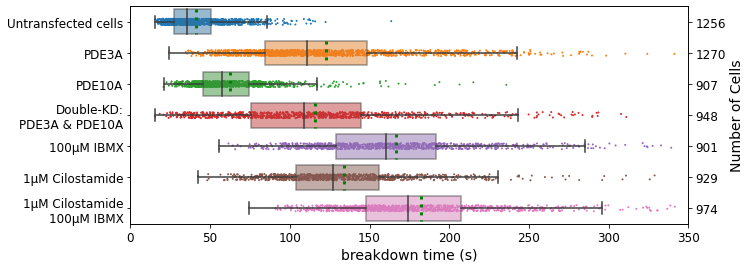

In [7]:
x_val=errorfree_data['breakdown_time']

# get a figure (top level) and an axis (sub level) at the same time
# get a figure (top level) and an axis (sub level) at the same time
title = 'Figure 5'
plt.rc('axes', labelsize=14)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=12)    # fontsize of the tick labels
plt.rc('ytick', labelsize=12)    # fontsize of the tick labels


fig, ax = plt.subplots()
sns.stripplot(ax=ax, x=x_val, y="condition", data=errorfree_data, size=2, zorder=0)
bbox_props = dict(alpha=0.5, )
sns.boxplot(ax=ax, x=x_val, y="condition", boxprops=bbox_props,
            data=errorfree_data, showmeans=True,
            meanprops={"linestyle":":", "linewidth":"3", "color":"green"}, meanline=True,
            showfliers=False, zorder=1)
ax2 = ax.twinx()
ax2.yaxis.set_label_position("right")
ax2.set_ylabel("Number of Cells")
# generate ticks with the nr of cells
allconditions = errorfree_data.condition.unique()
# yaxis runs from 0 to 1 if there would be 10 conditions they would be at 0.05 0.15 .. 0.85 0.95
ticks = [1 / (2 * (len(allconditions)))]
for i in range(0, len(allconditions) - 1):
    ticks.append(ticks[i] + 1 / (len(allconditions)))
ax2.set_yticks(ticks)
yticklabels = []
for condition in allconditions:
    yticklabels.append(str(sum(errorfree_data['condition'] == condition)))
ax2.set_yticklabels(reversed(yticklabels))
ax.yaxis.set_label_text("") # we loose the y-axis title "condition"
fig.set_size_inches([16, 6])
#ax.set_title(title)
ax.xaxis.set_label_text('breakdown time (s)')
xaxislength = 350
plt.xlim(0, xaxislength)
#plt.xticks(ticks=range(0, xaxislength, 50));
fig.set_size_inches([10, 4])

In [20]:
fig.savefig(Path('C:\\Users\\thinkBookUser\\Desktop', title+".svg"),dpi=300)